In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./logistic_regression.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [3]:
df.dtypes.value_counts()

object     15
float64    12
Name: count, dtype: int64

In [4]:
df.describe(include=object)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [5]:
df.describe(include=float)


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## Data Visualisation

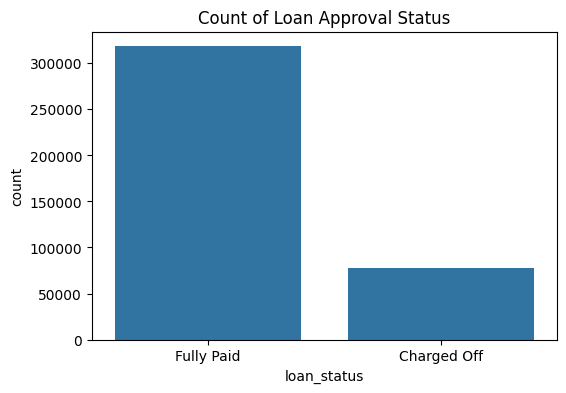

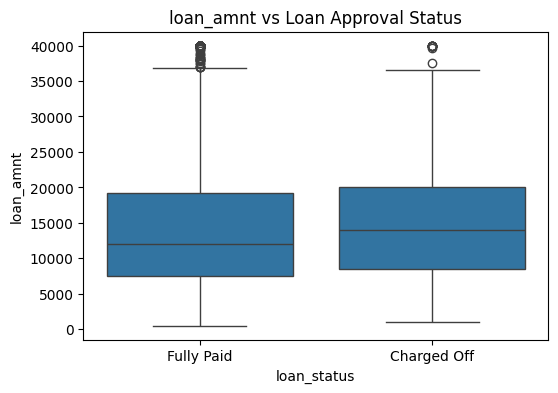

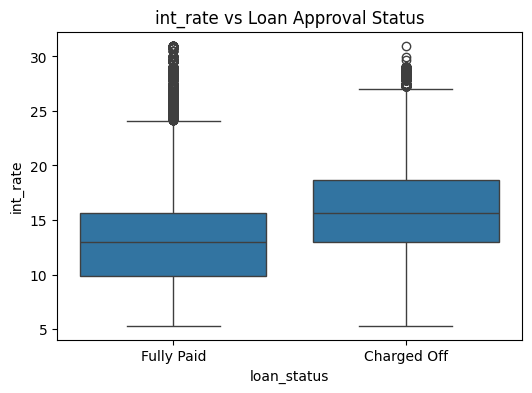

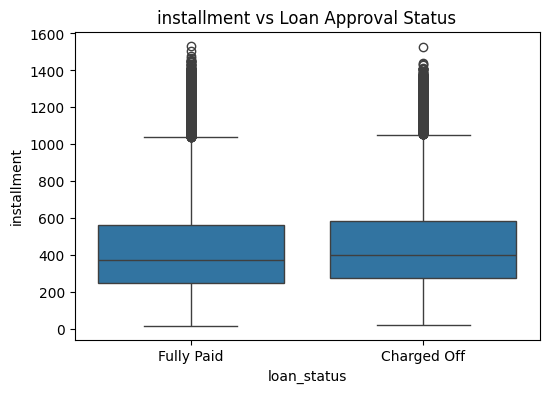

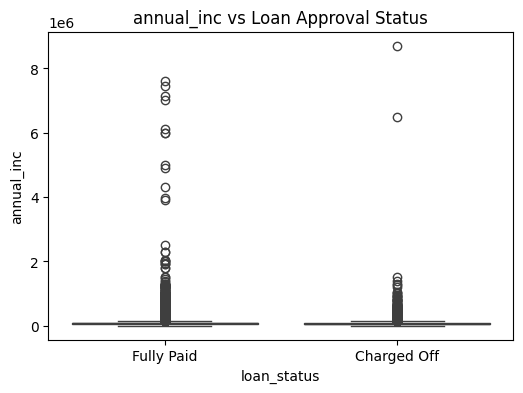

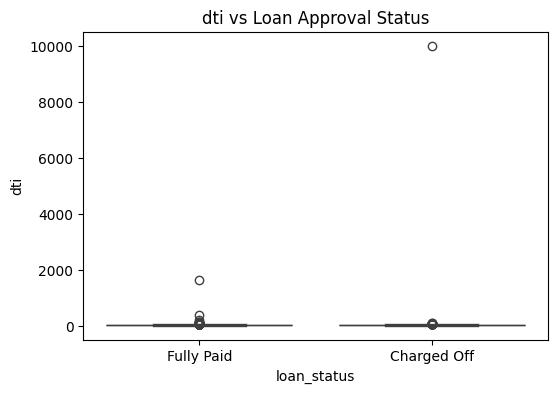

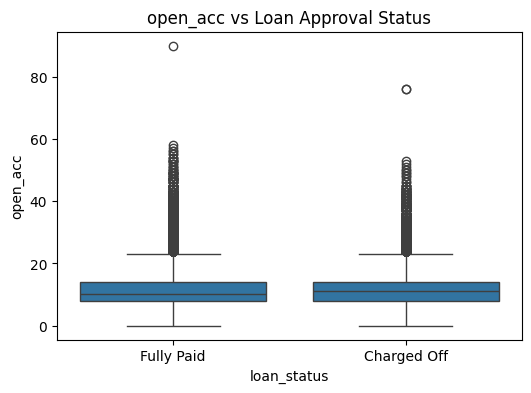

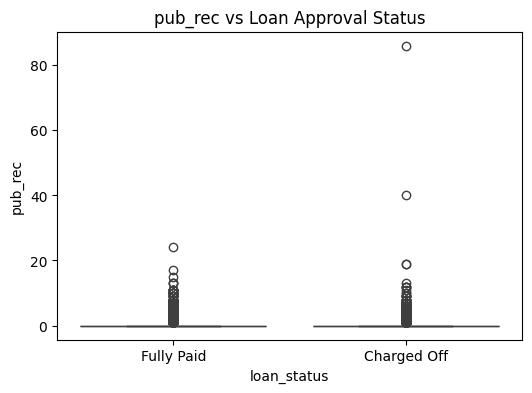

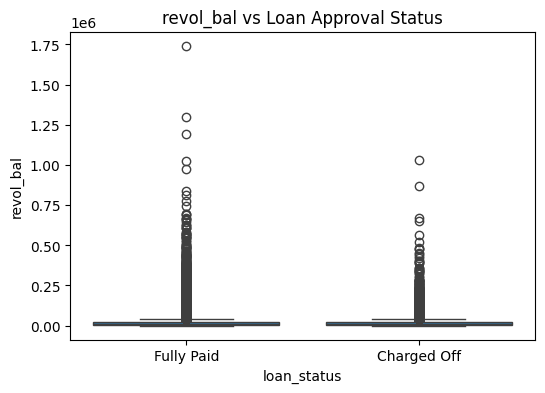

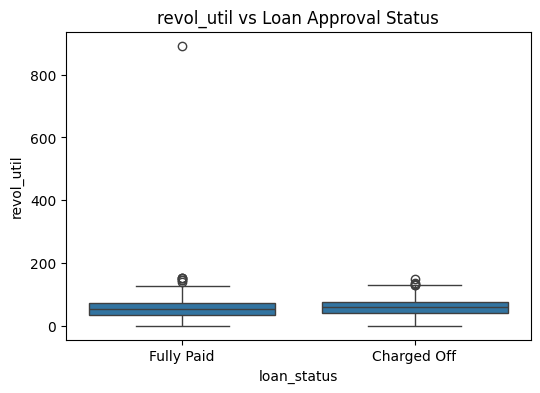

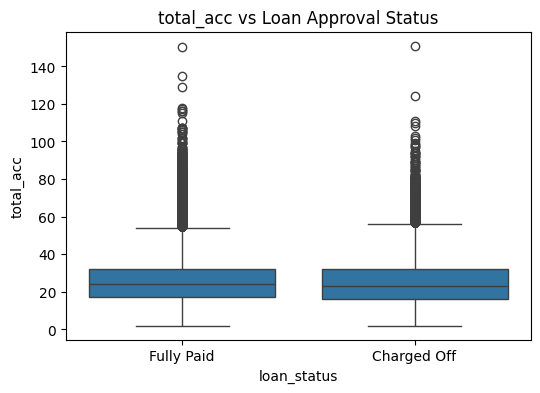

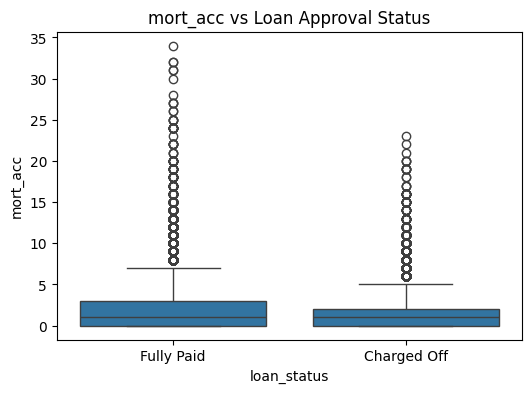

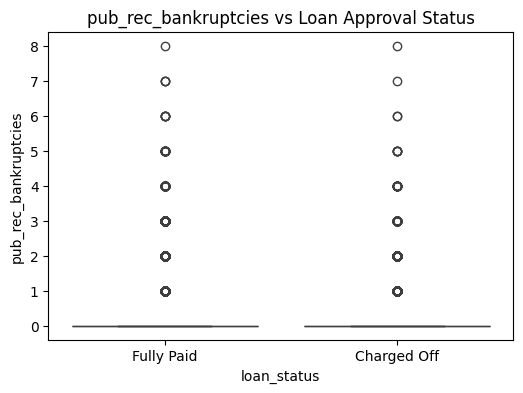

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Count plot for Loan_Status
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df)
plt.title('Count of Loan Approval Status')
plt.show()

numerical_columns = df.select_dtypes(include=['float64', 'int64'])
# Box plot for Loan_Amount and Loan_Status
for variable in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='loan_status', y=variable, data=df)
    plt.title( variable + ' vs Loan Approval Status')
    plt.show()

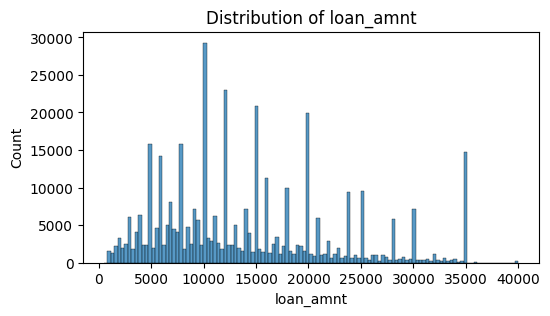

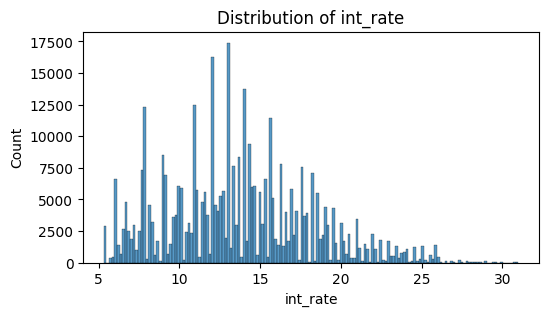

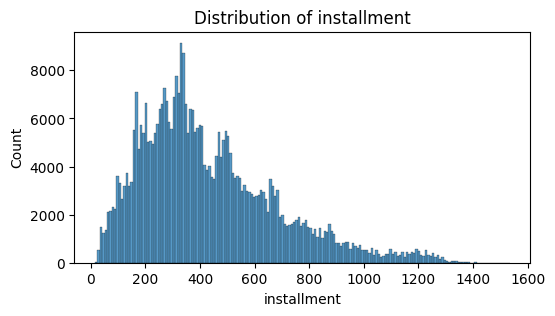

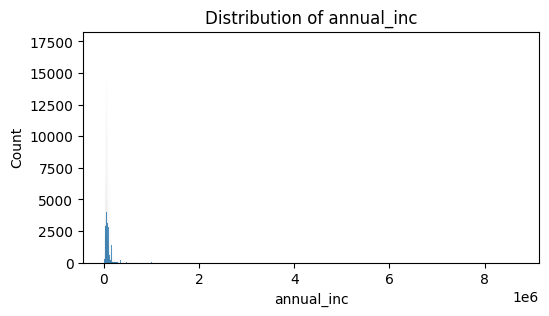

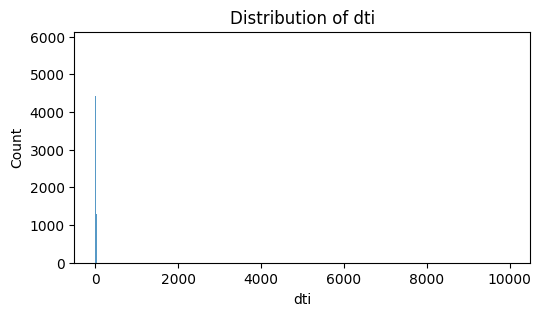

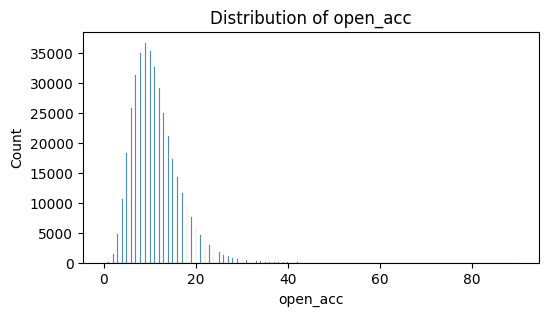

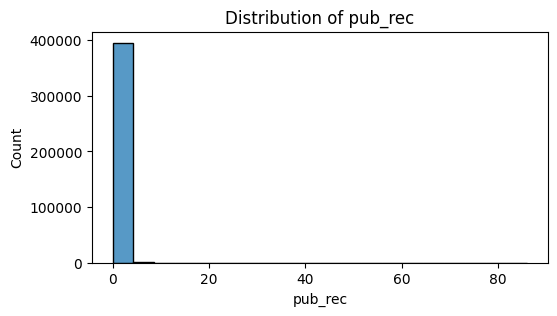

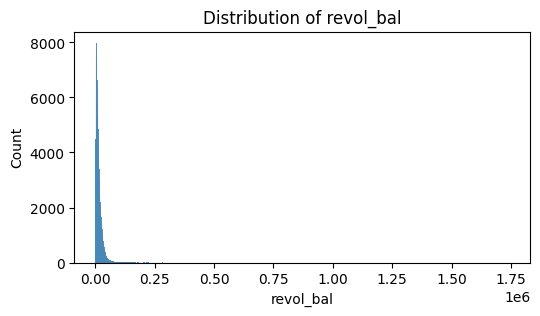

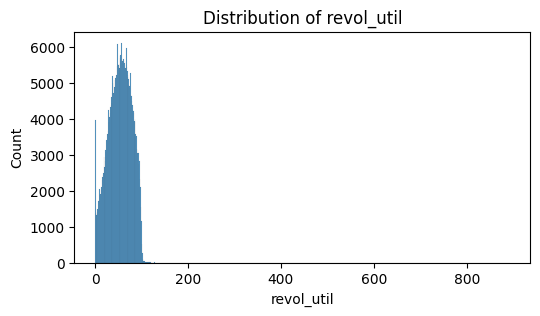

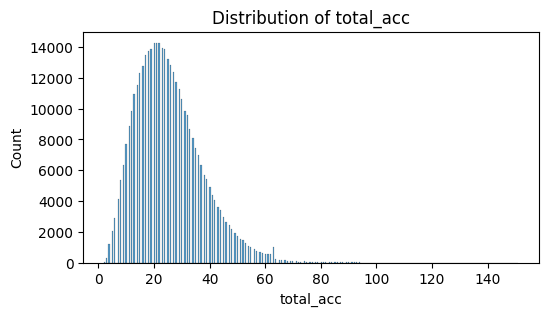

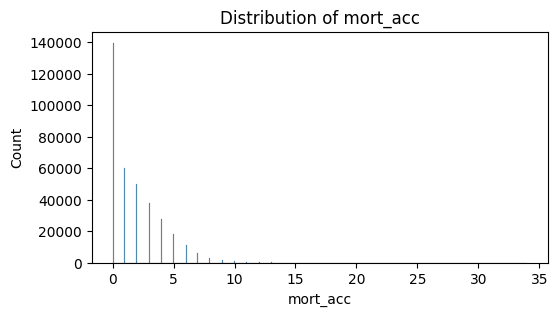

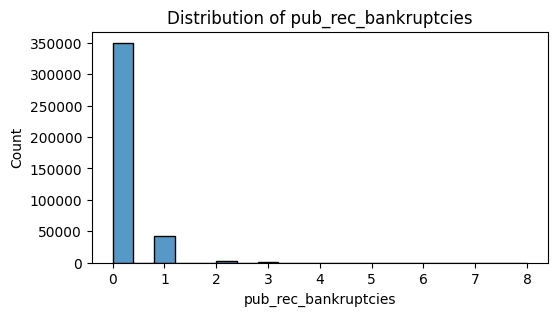

In [8]:
subplot = 1
for variable in numerical_columns:
    plt.figure(figsize=(20,3))
    plt.subplot(1,3,subplot)
    sns.histplot(df[variable])
    plt.title( 'Distribution of ' + variable)
    subplot += 1
    if(subplot == 4):
        subplot=1

plt.show()

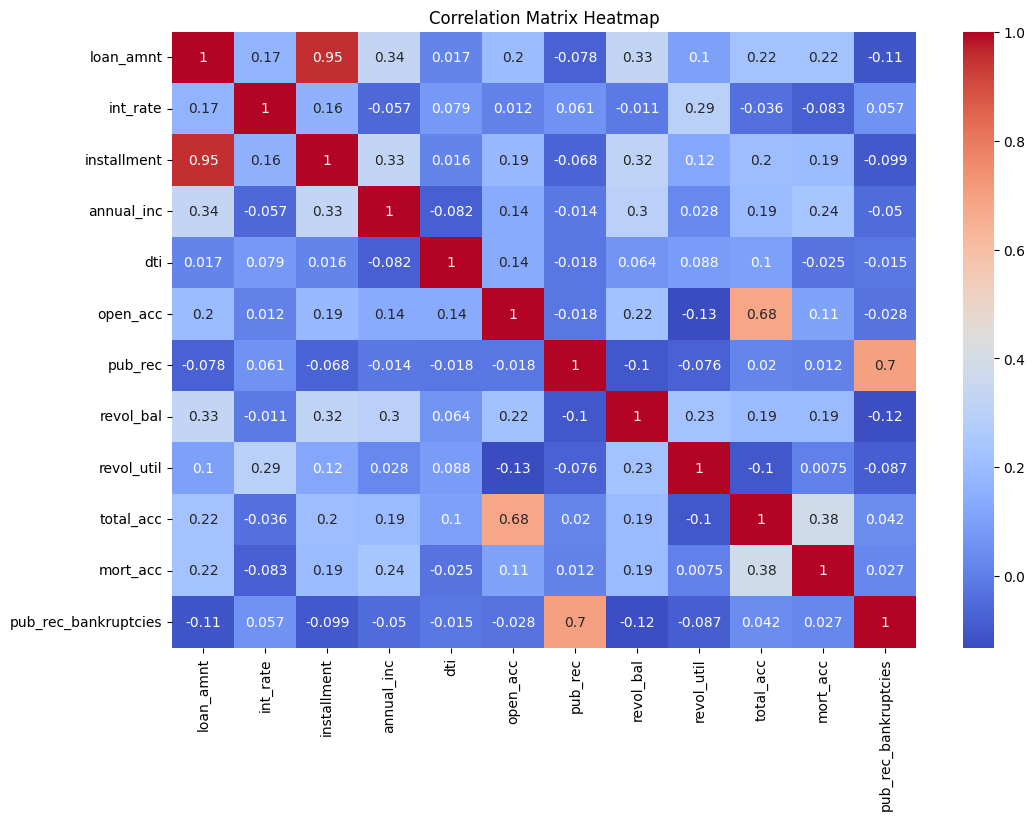

In [9]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()

# Heat map for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

1. Missing values and outlier treatment
 - Check how much data is missing - is it greater than 10% of all data?
 - Do we drop this data or apply some method to fill these empty spaces?
 - Are there repeated rows?
 
 - Check how many outliers are there in each column using IQR method
 - Can they be ignored/removed? Do we need to scale them?

In [10]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [11]:
# pd.get_dummies(df, columns=['grade', 'sub_grade'])
# mask = df.emp_title.isnull() and df.emp_length.isnull()
emp_legth_missing = df[df.emp_length.isnull()]
emp_title_missing = df[df.emp_title.isnull()]
emp_length_title_missing = emp_legth_missing[emp_legth_missing.emp_title.isnull()]
emp_title_length_missing = emp_title_missing[emp_title_missing.emp_length.isnull()]

print(len(emp_legth_missing))
print(len(emp_length_title_missing))

print(len(emp_title_missing))
print(len(emp_title_length_missing))

mort_acc_missing = df[df.mort_acc.isnull()]
len(mort_acc_missing[mort_acc_missing.pub_rec_bankruptcies.isnull()])

mort_acc_missing.head()


18301
18123
22927
18123


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
22,4200.0,36 months,6.99,129.67,A,A3,midstate steel llc,5 years,OWN,24000.0,...,6.0,0.0,0.0,0.0,7.0,f,INDIVIDUAL,NaN,0.0,"54395 Melissa Walks\r\nJenniferbury, AL 05113"
25,6000.0,36 months,11.36,197.47,B,B5,CSU Monterey Bay,2 years,RENT,46680.0,...,9.0,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\r\nEast Preston,..."
32,3000.0,36 months,6.03,91.31,A,A1,American Heart Association,1 year,OWN,64000.0,...,6.0,0.0,4912.0,13.4,18.0,f,INDIVIDUAL,NaN,0.0,"2722 Smith Branch Suite 131\r\nShaunbury, NH 2..."
41,28000.0,60 months,19.91,312.04,E,E4,American Airlines,10+ years,RENT,52000.0,...,10.0,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\r\nMatthewtown, CT ..."
62,5000.0,36 months,10.39,118.45,B,B4,self,10+ years,RENT,66000.0,...,12.0,0.0,15807.0,20.0,17.0,f,INDIVIDUAL,NaN,0.0,USS Goodman\r\nFPO AE 22690


In [12]:
df.drop(emp_length_title_missing.index, inplace=True)

In [13]:
df.emp_title.describe()
(df.emp_title.value_counts() >= 1000).value_counts()

count
False    173092
True         13
Name: count, dtype: int64

In [14]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                4804
emp_length                178
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1544
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                266
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                36788
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [15]:
# Lets remove rows with empty emp_length
# Lets remove title column - as 'purpose' gives that same information

missing_emp_length = df[df.emp_length.isnull()]
df.drop(missing_emp_length.index, inplace=True)




In [16]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                4804
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1542
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                265
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                36739
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [17]:
emp_title_counts = df['emp_title'].value_counts()
df['emp_title_counts'] = df['emp_title'].apply(lambda x: 0 if (type(x)==float) else emp_title_counts[x])[40]


In [18]:
missing_revol_util = df[df.revol_util.isnull()]
df.drop(missing_revol_util.index, inplace=True)

missing_pub_rec_bankruptcies = df[df.pub_rec_bankruptcies.isnull()]
df.drop(missing_pub_rec_bankruptcies.index, inplace=True)


In [19]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                4768
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1541
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                36154
pub_rec_bankruptcies        0
address                     0
emp_title_counts            0
dtype: int64

We will use MICE imputation to impute values where we have missing mort_acc

Lets first do encoding of categorical variables and also do outlier treatment

In [20]:
df.describe(include=object)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,376929,376929,376929,372161,376929,376929,376929,376929,376929,376929,375388,376929,376929,376929,376929
unique,2,7,35,172566,11,6,3,112,2,14,46765,665,2,3,374809
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USNS Johnson\r\nFPO AE 05113
freq,285598,110538,25430,4386,125876,189448,127694,14140,304440,224188,145223,2918,226586,376292,8


We can see that sub_grade include information about grade so we can remove that

Lets first deal with categorical columns. We have total 13 of them
- term 
- grade
- sub_grade
- emp_length
- home_ownership
- verification_status
- issue_d
- loan_status
- purpose
- earliest_cr_line
- initial_list_status
- application_type

In [21]:
# Column = purpose
dummies_purposes = pd.get_dummies(df.purpose, dtype=int)
merged = pd.concat([df, dummies_purposes], axis = 'columns')
merged.drop(columns = ['purpose', 'other'], inplace=True)
merged.drop(columns = ['emp_title'], inplace=True)
merged.drop(columns = ['grade'], inplace=True)
merged.drop(columns = ['address'], inplace=True)
merged.drop(columns = ['title'], inplace=True)

In [22]:
# Column = emp_length
year_values_str = np.sort(list(df['emp_length'].unique()))
years_values_bins = ['0-2 years','10+ years','0-2 years','3-6 years','3-6 years','3-6 years','3-6 years','7-9 years','7-9 years','7-9 years','0-2 years']
years_bin_mapping = dict(zip(year_values_str, years_values_bins))

# years_bin_mapping['1 year']

emp_length_bin = df['emp_length'].apply(lambda x: years_bin_mapping[x])
dummies_emp_length = pd.get_dummies(emp_length_bin,dtype=int)
merged = pd.concat([merged, dummies_emp_length], axis = 'columns')
merged.drop(columns = ['emp_length', '0-2 years'], inplace=True)


In [23]:
# column = application_type
dummies_application_type = pd.get_dummies(df['application_type'], dtype=int)
merged = pd.concat([merged, dummies_application_type], axis = 'columns')
merged.drop(columns = ['application_type', 'DIRECT_PAY'], inplace=True)


In [24]:
# Column = issue_d

import calendar

data = np.array(df['issue_d'].apply(lambda x: x.split('-')))
calendar_dict = {month: index for index, month in enumerate(calendar.month_abbr) if month}

def eval_numeric_val(x):
    num_val_arr = []
    for elem in x:
        curr = calendar_dict[elem[0]] + (int(elem[1])-1900)*12
        num_val_arr.append(curr)
    return np.array(num_val_arr)

date_eval_numeric = eval_numeric_val(data)
merged['issued_date_transformed'] = date_eval_numeric
merged.drop(columns = ['issue_d'], inplace=True)


In [25]:
# Column = earliest_cr_line

data = np.array(df['earliest_cr_line'].apply(lambda x: x.split('-')))
date_eval_numeric = eval_numeric_val(data)
merged['earliest_cr_line_date_transformed'] = date_eval_numeric
merged.drop(columns = ['earliest_cr_line'], inplace=True)


In [26]:
dummies_initial_list_status = pd.get_dummies(df['initial_list_status'], dtype=int)
dummies_verification_status = pd.get_dummies(df['verification_status'], dtype=int)
dummies_home_ownership = pd.get_dummies(df['home_ownership'], dtype=int)
dummies_term = pd.get_dummies(df['term'], dtype=int)

merged = pd.concat([merged, dummies_initial_list_status, dummies_verification_status, dummies_home_ownership, dummies_term], axis = 'columns')
merged.drop(columns = ['initial_list_status', 'verification_status', 'home_ownership', 'term'], inplace=True)
merged.drop(columns=[' 60 months','NONE', 'Not Verified', 'w'], inplace=True)


In [27]:
def get_subgrade_mapping(x):
    mapping = {}
    for item in x:
        mapping[item] = (ord(item[0]) - ord('A'))*5 + ord(item[1]) - ord('0')
    return mapping

grades_unique = np.array(merged.sub_grade.unique())
grade_mapping = get_subgrade_mapping(grades_unique)



In [28]:
merged['sub_grade']
merged['sub_grade'] = merged['sub_grade'].apply(lambda x: grade_mapping[x])

# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder()
# encoder.fit(pd.DataFrame(merged.sub_grade))
# encoder.categories_

# encoder.transform(pd.DataFrame(merged.sub_grade))
# merged['sub_grade'] = encoder.transform(pd.DataFrame(merged.sub_grade))


In [29]:
merged['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0}, inplace=True)

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

merged_copy = merged.copy()
missing_mask = merged_copy.mort_acc.isna()

imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_values = imputer.fit_transform(merged_copy)

In [31]:
type(imputed_values[missing_mask])
merged.columns.get_loc('mort_acc')
merged['mort_acc'] = imputed_values[:, 12]

### Outlier Treatment

In [32]:
to_scale=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 
            'dti', 'open_acc', 'pub_rec', 'revol_bal', 
            'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']



In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged[to_scale] = scaler.fit_transform(merged[to_scale])

## Test Train Split

In [34]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(merged, train_size = 0.70, random_state = 100)

Let's deal with other data first - we will use that data to predict missing values
1. Encoding data
2. conversion to correct data type

In [35]:
X_train = train.drop(columns='loan_status')
X_test = test.drop(columns='loan_status')

Y_train = train['loan_status']
Y_test = test['loan_status']

## Logistic Regression modelling

In [36]:
from sklearn.linear_model import LogisticRegression
X_train.isnull().sum()

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [37]:
Y_pred = lr.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
print('Accuracy: ', accuracy_score(Y_test, lr.predict(X_test)))
print('Recall: ', recall_score(Y_test, lr.predict(X_test)))
print('Precision: ', precision_score(Y_test, lr.predict(X_test)))
print('F1-score: ', f1_score(Y_test, lr.predict(X_test)))
print('ROC-AUC: ', roc_auc_score(Y_test, lr.predict(X_test)))

Accuracy:  0.8063389311896992
Recall:  0.9847904165389164
Precision:  0.8142967087690706
F1-score:  0.891464992144482
ROC-AUC:  0.5210093199679183


In [39]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logReg, n_features_to_select = 30)
rfe.fit(X_train, Y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression(), n_features_to_select=30)

In [40]:
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['loan_amnt', 'int_rate', 'installment', 'sub_grade', 'annual_inc',
       'dti', 'open_acc', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'car', 'credit_card', 'debt_consolidation',
       'home_improvement', 'house', 'medical', 'moving', 'small_business',
       'vacation', 'wedding', '3-6 years', '7-9 years', 'JOINT',
       'Source Verified', 'Verified', 'MORTGAGE', 'OWN', 'RENT', ' 36 months'],
      dtype='object')

In [41]:
X_train_rfe = X_train[selected_features]
Y_train_rfe = Y_train

X_test_rfe = X_test[selected_features]
Y_test_rfe = Y_test

In [42]:
lr_rfe = LogisticRegression()
lr_rfe.fit(X_train_rfe, Y_train_rfe)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
print('Accuracy: ', accuracy_score(Y_test_rfe, lr_rfe.predict(X_test_rfe)))
print('Recall: ', recall_score(Y_test_rfe, lr_rfe.predict(X_test_rfe)))
print('Precision: ', precision_score(Y_test_rfe, lr_rfe.predict(X_test_rfe)))
print('F1-score: ', f1_score(Y_test_rfe, lr_rfe.predict(X_test_rfe)))
print('ROC-AUC: ', roc_auc_score(Y_test_rfe, lr_rfe.predict(X_test_rfe)))

Accuracy:  0.8074708831878599
Recall:  0.9843305155271341
Precision:  0.8154817522883347
F1-score:  0.8919858898475369
ROC-AUC:  0.5246865172441462


In [44]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_rfe)
X_test_sm = sm.add_constant(X_test_rfe)
logreg = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               263850
Model:                            GLM   Df Residuals:                   263819
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1764e+05
Date:                Sat, 03 Feb 2024   Deviance:                   2.3528e+05
Time:                        11:40:59   Pearson chi2:                 4.25e+11
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08363
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.4524      0.287      8.547      0.000       1.890       3.015
loan_amnt                0.2302      0.171      1.349      0.177      -0.104       0.565
int_rate                 1.2824      0.129      9.966      0.000       1.030       1.535
installment             -0.6648      0.205     -3.240      0.001      -1.067      -0.263
sub_grade               -0.1036      0.003    -31.035      0.000      -0.110      -0.097
annual_inc              24.8976      1.459     17.060      0.000      22.037      27.758
dti                     -9.2445      0.277    -33.339      0.000      -9.788      -8.701
open_acc                -1.7771      0.130    -13.715      0.000      -2.031      -1.523
revol_util              -2.5117      0.216    -11.650      0.000      -2.934      -2.089
total_acc                1.2633      0.102     12.426      0.000       1.064       1.463
mort_acc                 1.2564      0.122     10.301      0.000       1.017       1.495
pub_rec_bankruptcies    -0.2764      0.118     -2.342      0.019      -0.508      -0.045
car                      0.2141      0.060      3.593      0.000       0.097       0.331
credit_card              0.0465      0.023      2.002      0.045       0.001       0.092
debt_consolidation      -0.0149      0.020     -0.728      0.467      -0.055       0.025
home_improvement        -0.0781      0.030     -2.613      0.009      -0.137      -0.020
house                    0.1139      0.072      1.585      0.113      -0.027       0.255
medical                 -0.1043      0.052     -1.992      0.046      -0.207      -0.002
moving                  -0.0682      0.060     -1.128      0.259      -0.187       0.050
small_business          -0.4391      0.042    -10.364      0.000      -0.522      -0.356
vacation                -0.0565      0.068     -0.825      0.409      -0.191       0.078
wedding                  0.6360      0.096      6.604      0.000       0.447       0.825
3-6 years                0.0009      0.012      0.077      0.939      -0.023       0.025
7-9 years               -0.0325      0.015     -2.157      0.031      -0.062      -0.003
JOINT                    1.5398      0.231      6.665      0.000       1.087       1.993
Source Verified         -0.1484      0.014    -10.811      0.000      -0.175      -0.122
Verified                -0.0525      0.014     -3.670      0.000      -0.081      -0.024
MORTGAGE                 0.2069      0.283      0.730      0.465      -0.349       0.762
OWN                      0.1015      0.284      0.358      0.721      -0.455       0.658
RENT                    -0.0431      0.283     -0.152      0.879      -0.599       0.512
 36 months               0.4642      0.028     16.349      0.000       0.409       0.520
=========================================================

In [45]:
X_train_sm.drop(columns = ['loan_amnt', 'debt_consolidation','house', 'moving',
                        'vacation','3-6 years', 'MORTGAGE', 'OWN', 'RENT'], inplace=True)

X_test_sm.drop(columns = ['loan_amnt', 'debt_consolidation','house', 'moving',
                        'vacation','3-6 years', 'MORTGAGE', 'OWN', 'RENT'], inplace=True)

In [46]:
logreg = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               263850
Model:                            GLM   Df Residuals:                   263828
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1783e+05
Date:                Sat, 03 Feb 2024   Deviance:                   2.3566e+05
Time:                        11:41:00   Pearson chi2:                 7.31e+11
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08231
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.4847      0.029     84.957      0.000       2.427       2.542
int_rate                 1.2631      0.127      9.965      0.000       1.015       1.512
installment             -0.3570      0.038     -9.393      0.000      -0.432      -0.283
sub_grade               -0.1053      0.003    -31.630      0.000      -0.112      -0.099
annual_inc              25.6078      1.454     17.614      0.000      22.758      28.457
dti                     -9.1038      0.276    -32.935      0.000      -9.646      -8.562
open_acc                -1.5714      0.129    -12.193      0.000      -1.824      -1.319
revol_util              -2.4350      0.213    -11.408      0.000      -2.853      -2.017
total_acc                1.1594      0.101     11.452      0.000       0.961       1.358
mort_acc                 2.3078      0.110     20.888      0.000       2.091       2.524
pub_rec_bankruptcies    -0.2859      0.118     -2.428      0.015      -0.517      -0.055
car                      0.2207      0.057      3.883      0.000       0.109       0.332
credit_card              0.0561      0.014      4.074      0.000       0.029       0.083
home_improvement        -0.0006      0.024     -0.024      0.980      -0.047       0.046
medical                 -0.0823      0.049     -1.665      0.096      -0.179       0.015
small_business          -0.4238      0.039    -10.969      0.000      -0.500      -0.348
wedding                  0.6307      0.095      6.659      0.000       0.445       0.816
7-9 years               -0.0222      0.015     -1.522      0.128      -0.051       0.006
JOINT                    1.5770      0.231      6.830      0.000       1.124       2.030
Source Verified         -0.1539      0.014    -11.227      0.000      -0.181      -0.127
Verified                -0.0548      0.014     -3.833      0.000      -0.083      -0.027
 36 months               0.4092      0.013     31.476      0.000       0.384       0.435
========================================================================================
"""

In [47]:
X_train_sm.drop(columns = ['home_improvement', 'medical','7-9 years'], inplace=True)

X_test_sm.drop(columns = ['home_improvement', 'medical','7-9 years'], inplace=True)

In [48]:
logreg = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               263850
Model:                            GLM   Df Residuals:                   263831
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1783e+05
Date:                Sat, 03 Feb 2024   Deviance:                   2.3566e+05
Time:                        11:41:01   Pearson chi2:                 6.62e+11
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08229
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.4808      0.029     85.400      0.000       2.424       2.538
int_rate                 1.2606      0.127      9.947      0.000       1.012       1.509
installment             -0.3530      0.038     -9.316      0.000      -0.427      -0.279
sub_grade               -0.1053      0.003    -31.649      0.000      -0.112      -0.099
annual_inc              25.5110      1.449     17.600      0.000      22.670      28.352
dti                     -9.1084      0.276    -32.974      0.000      -9.650      -8.567
open_acc                -1.5695      0.129    -12.181      0.000      -1.822      -1.317
revol_util              -2.4251      0.213    -11.404      0.000      -2.842      -2.008
total_acc                1.1591      0.101     11.451      0.000       0.961       1.357
mort_acc                 2.3086      0.110     20.942      0.000       2.092       2.525
pub_rec_bankruptcies    -0.2857      0.118     -2.428      0.015      -0.516      -0.055
car                      0.2228      0.057      3.923      0.000       0.112       0.334
credit_card              0.0571      0.014      4.177      0.000       0.030       0.084
small_business          -0.4219      0.039    -10.940      0.000      -0.498      -0.346
wedding                  0.6330      0.095      6.685      0.000       0.447       0.819
JOINT                    1.5771      0.231      6.830      0.000       1.124       2.030
Source Verified         -0.1537      0.014    -11.215      0.000      -0.181      -0.127
Verified                -0.0548      0.014     -3.833      0.000      -0.083      -0.027
 36 months               0.4084      0.013     31.454      0.000       0.383       0.434
========================================================================================
"""

In [49]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()
logReg.fit(X_train_sm, Y_train)


print('Accuracy: ', accuracy_score(Y_test, logReg.predict(X_test_sm)))
print('Recall: ', recall_score(Y_test, logReg.predict(X_test_sm)))
print('Precision: ', precision_score(Y_test, logReg.predict(X_test_sm)))
print('F1-score: ', f1_score(Y_test, logReg.predict(X_test_sm)))
print('ROC-AUC: ', roc_auc_score(Y_test, logReg.predict(X_test_sm)))

Accuracy:  0.8075946904376586
Recall:  0.983268363190399
Precision:  0.8161417859577369
F1-score:  0.891943838807245
ROC-AUC:  0.5267065787452799


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['feature'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif

,feature,VIF
0,const,28.913334
1,int_rate,20.790033
2,installment,1.332369
3,sub_grade,21.353094
4,annual_inc,1.260180
5,dti,1.299683
6,open_acc,2.116169
7,revol_util,1.251543
8,total_acc,2.350054
9,mort_acc,1.350520


In [51]:
X_train_sm.drop(columns = ['int_rate','sub_grade'], inplace=True)

X_test_sm.drop(columns = ['int_rate','sub_grade'], inplace=True)

In [52]:
vif = pd.DataFrame()
vif['feature'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif

,feature,VIF
0,const,23.016150
1,installment,1.315839
2,annual_inc,1.248895
3,dti,1.290815
4,open_acc,2.111577
5,revol_util,1.140976
6,total_acc,2.341802
7,mort_acc,1.333256
8,pub_rec_bankruptcies,1.029953
9,car,1.014165


In [53]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()
logReg.fit(X_train_sm, Y_train)


print('Accuracy: ', accuracy_score(Y_test, logReg.predict(X_test_sm)))
print('Recall: ', recall_score(Y_test, logReg.predict(X_test_sm)))
print('Precision: ', precision_score(Y_test, logReg.predict(X_test_sm)))
print('F1-score: ', f1_score(Y_test, logReg.predict(X_test_sm)))
print('ROC-AUC: ', roc_auc_score(Y_test, logReg.predict(X_test_sm)))

Accuracy:  0.8084878713112073
Recall:  0.9959156410144102
Precision:  0.8103694067751306
F1-score:  0.8936126312893623
ROC-AUC:  0.5088059014081474


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Probability cutoff tuning

In [66]:
odds = logReg.predict_proba(X_test_sm)
odds[:, 1]

array([0.84214034, 0.84827669, 0.83897223, ..., 0.89658103, 0.89404694,
       0.89576436])

In [68]:
prob=pd.DataFrame()
prob['y_actual'] = Y_test
prob['y=1|x'] = odds[:,1]
prob

,y_actual,y=1|x
63252,1,0.842140
118566,1,0.848277
58362,1,0.838972
174276,1,0.877809
369908,1,0.898563
...,...,...
222942,1,0.760170
167981,1,0.683403
365061,1,0.896581
310160,0,0.894047


In [70]:
cut = [float(x)/20 for x in range(0, 21)]
cut

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95,
 1.0]

In [73]:
for i in cut:
    prob[i] = prob['y=1|x'].map(lambda x: x>i)
prob

,y_actual,y=1|x,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0
63252,1,0.842140,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
118566,1,0.848277,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
58362,1,0.838972,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
174276,1,0.877809,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
369908,1,0.898563,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222942,1,0.760170,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,False
167981,1,0.683403,True,True,True,True,True,True,True,True,...,True,True,True,False,False,False,False,False,False,False
365061,1,0.896581,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
310160,0,0.894047,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False


In [76]:
cut_df = pd.DataFrame(columns = ['prob', 'accuracy', 'precision', 'recall', 'f1-score', 'ROC-AUC'])

for i in cut:
    accuracy = accuracy_score(prob['y_actual'], prob[i])
    precision = precision_score(prob['y_actual'], prob[i])
    recall = recall_score(prob['y_actual'], prob[i])
    f1 = f1_score(prob['y_actual'], prob[i])
    roc_auc = roc_auc_score(prob['y_actual'], prob[i])
    cut_df.loc[i] = [i, accuracy, precision, recall, f1, roc_auc]

cut_df

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,prob,accuracy,precision,recall,f1-score,ROC-AUC
0.00,0.00,0.807612,0.807612,1.000000,0.893568,0.500000
0.05,0.05,0.807612,0.807612,1.000000,0.893568,0.500000
0.10,0.10,0.807612,0.807612,1.000000,0.893568,0.500000
0.15,0.15,0.807612,0.807612,1.000000,0.893568,0.500000
0.20,0.20,0.807612,0.807612,1.000000,0.893568,0.500000
0.25,0.25,0.807612,0.807612,1.000000,0.893568,0.500000
0.30,0.30,0.807604,0.807611,0.999989,0.893563,0.499995
0.35,0.35,0.807604,0.807622,0.999967,0.893561,0.500030
0.40,0.40,0.807701,0.807760,0.999847,0.893597,0.500475
0.45,0.45,0.807984,0.808360,0.999102,0.893666,0.502401


<Axes: xlabel='prob'>

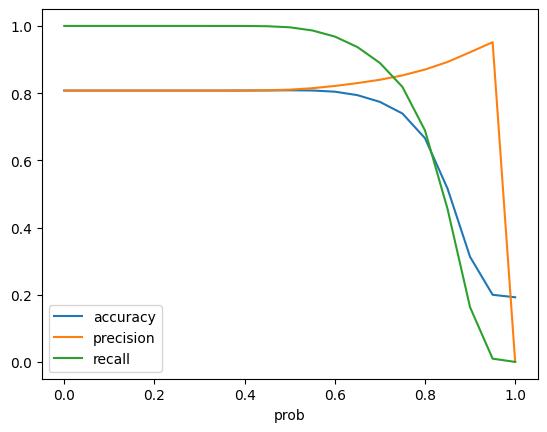

In [77]:
cut_df.plot.line(x = 'prob', y = ['accuracy', 'precision', 'recall'])

In [84]:
prob_precise=pd.DataFrame()
prob_precise['y_actual'] = Y_test
prob_precise['y=1|x'] = odds[:,1]
prob_precise

,y_actual,y=1|x
63252,1,0.842140
118566,1,0.848277
58362,1,0.838972
174276,1,0.877809
369908,1,0.898563
...,...,...
222942,1,0.760170
167981,1,0.683403
365061,1,0.896581
310160,0,0.894047


In [85]:

cut_precise = [float(x)/100 for x in range(70, 80)]
for i in cut_precise:
    prob_precise[i] = prob_precise['y=1|x'].map(lambda x: x>i)
prob_precise

,y_actual,y=1|x,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79
63252,1,0.842140,True,True,True,True,True,True,True,True,True,True
118566,1,0.848277,True,True,True,True,True,True,True,True,True,True
58362,1,0.838972,True,True,True,True,True,True,True,True,True,True
174276,1,0.877809,True,True,True,True,True,True,True,True,True,True
369908,1,0.898563,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
222942,1,0.760170,True,True,True,True,True,True,True,False,False,False
167981,1,0.683403,False,False,False,False,False,False,False,False,False,False
365061,1,0.896581,True,True,True,True,True,True,True,True,True,True
310160,0,0.894047,True,True,True,True,True,True,True,True,True,True


In [87]:

cut_precise_df = pd.DataFrame(columns = ['prob', 'accuracy', 'precision', 'recall', 'f1-score', 'ROC-AUC'])

for i in cut_precise:
    accuracy = accuracy_score(prob_precise['y_actual'], prob_precise[i])
    precision = precision_score(prob_precise['y_actual'], prob_precise[i])
    recall = recall_score(prob_precise['y_actual'], prob_precise[i])
    f1 = f1_score(prob_precise['y_actual'], prob_precise[i])
    roc_auc = roc_auc_score(prob_precise['y_actual'], prob_precise[i])
    cut_precise_df.loc[i] = [i, accuracy, precision, recall, f1, roc_auc]

cut_precise_df

,prob,accuracy,precision,recall,f1-score,ROC-AUC
0.70,0.70,0.773963,0.839809,0.889854,0.864108,0.588664
0.71,0.71,0.768834,0.842403,0.878028,0.859847,0.594243
0.72,0.72,0.762352,0.844514,0.864997,0.854633,0.598231
0.73,0.73,0.755852,0.847226,0.851178,0.849198,0.603433
0.74,0.74,0.747981,0.849741,0.835728,0.842676,0.607682
0.75,0.75,0.739253,0.852765,0.818449,0.835254,0.612626
0.76,0.76,0.727995,0.855551,0.797917,0.825730,0.616196
0.77,0.77,0.716128,0.859099,0.775733,0.815290,0.620824
0.78,0.78,0.701890,0.862316,0.750745,0.802672,0.623775
0.79,0.79,0.685344,0.866157,0.721946,0.787504,0.626820


<Axes: xlabel='prob'>

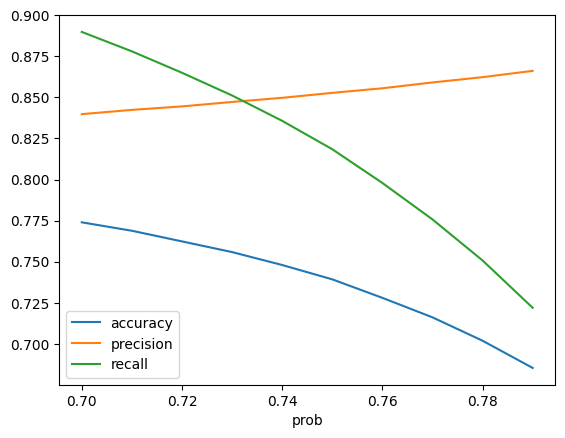

In [89]:
cut_precise_df.plot.line(x = 'prob', y = ['accuracy', 'precision', 'recall'])

In [93]:
y_pred = [0 if i <= 0.73 else 1 for i in prob['y=1|x']]

In [94]:
print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('Recall: ', recall_score(Y_test, y_pred))
print('Precision: ', precision_score(Y_test, y_pred))
print('F1-score: ', f1_score(Y_test, y_pred))
print('ROC-AUC: ', roc_auc_score(Y_test, y_pred))

Accuracy:  0.7558521033967404
Recall:  0.8511782225920898
Precision:  0.8472261580381472
F1-score:  0.8491975922304642
ROC-AUC:  0.603433285049205


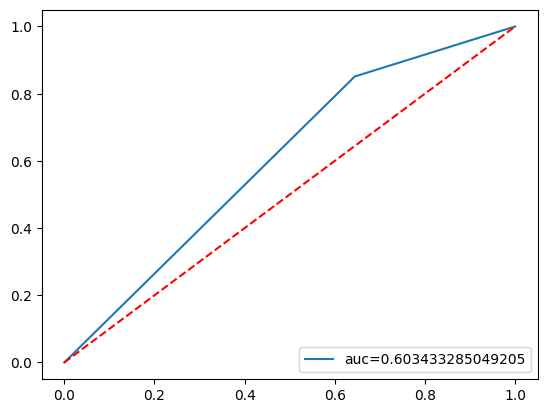

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.plot([0,1],[0,1], 'r--')
plt.legend(loc=4)
plt.show()